In [3]:
import numpy as np
import matplotlib.pyplot as plt
import src.simulator as sim
import random
import mogp_emulator
import src.testfunctions as tfs

from src.testfunctions import arrays_to_arraymesh, arraymesh_to_arrays

plt.rcParams['figure.figsize'] = [15, 6]

random.seed(2022)

true_params = [1.5745]

n = 200
x_locations = np.linspace(0, 3, n)
y_locations = x_locations
t_month = 6
t_hour = 12

variable_params = arrays_to_arraymesh(x_locations, y_locations, t_month, t_hour)
xy = variable_params[:, 0:2]

# Demonstrate Simulator.py

## Base variability

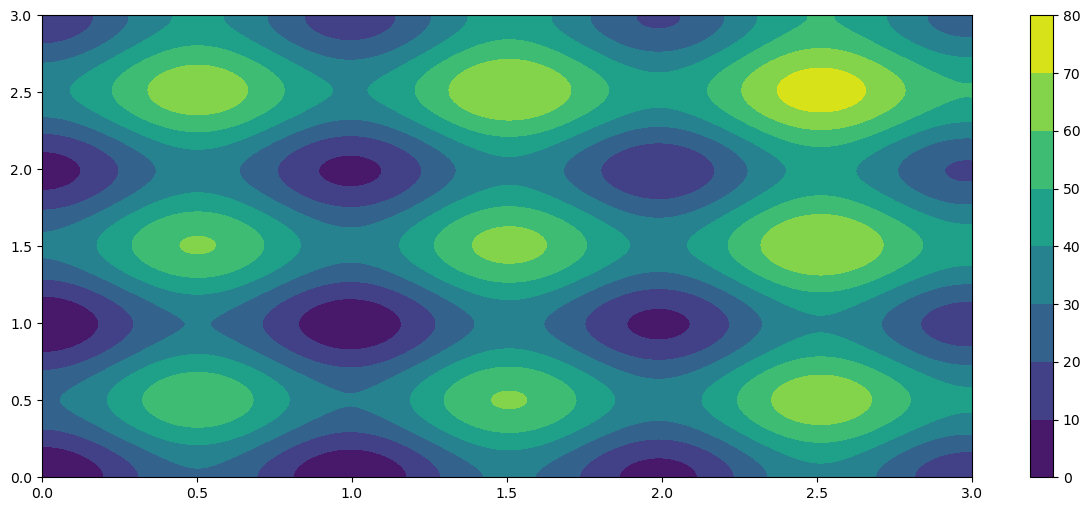

In [4]:
rastrigin = tfs.Rastrigin(10)
annual_field = rastrigin.eval(xy)
monthly_fluctuation = (1-0.5*np.cos(2*np.pi*(t_month-1)/12))
output = arraymesh_to_arrays(annual_field*monthly_fluctuation, (n, n))

fig, ax = plt.subplots(1, 1)
im = ax.contourf(x_locations, y_locations, output)
plt.colorbar(im)
plt.show()

## Hourly Variation

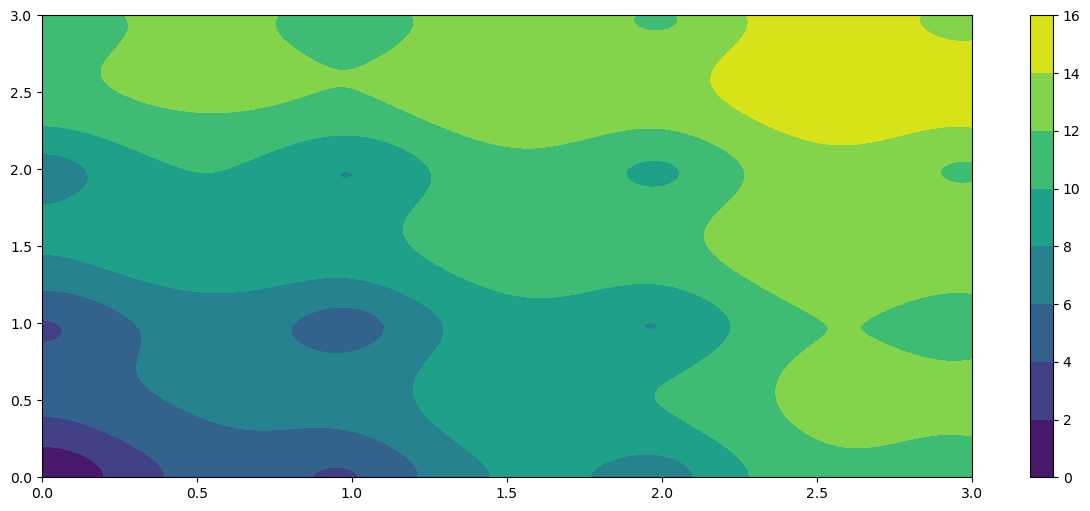

In [5]:
ackley = tfs.Ackley()
day_field = ackley.eval(xy)
hourly_fluctuation = (1-0.5*np.cos(2*np.pi*(t_hour-1)/24))
output = arraymesh_to_arrays(day_field*hourly_fluctuation, (n, n))

fig, ax = plt.subplots(1, 1)
im = ax.contourf(x_locations, y_locations, output)
plt.colorbar(im)
plt.show()

## Calibration Fluctuation

Currently just used to scale an additional process.

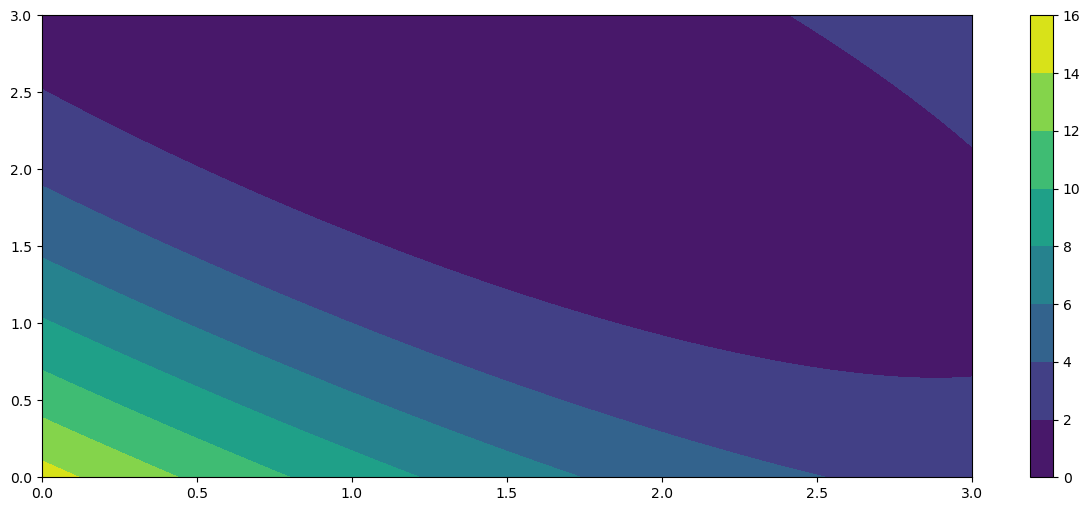

In [6]:
booth = tfs.Booth()
calibration_field = booth.eval(xy)
# k = true_params[0]
true_params[0] = 1
# k = 1 + (np.sin(3*true_params[0]) + np.sin(10*true_params[0]) + np.sin(30*true_params[0]))/3
k = true_params[0]**2
output = arraymesh_to_arrays(calibration_field*k, (n, n))

fig, ax = plt.subplots(1, 1)
im = ax.contourf(x_locations, y_locations, 0.2*output)
plt.colorbar(im)
plt.show()

## Constant Bias

Does not vary with time.

Included in obseravtions but NOT the simulation!! Should be picked up by the discrepancy

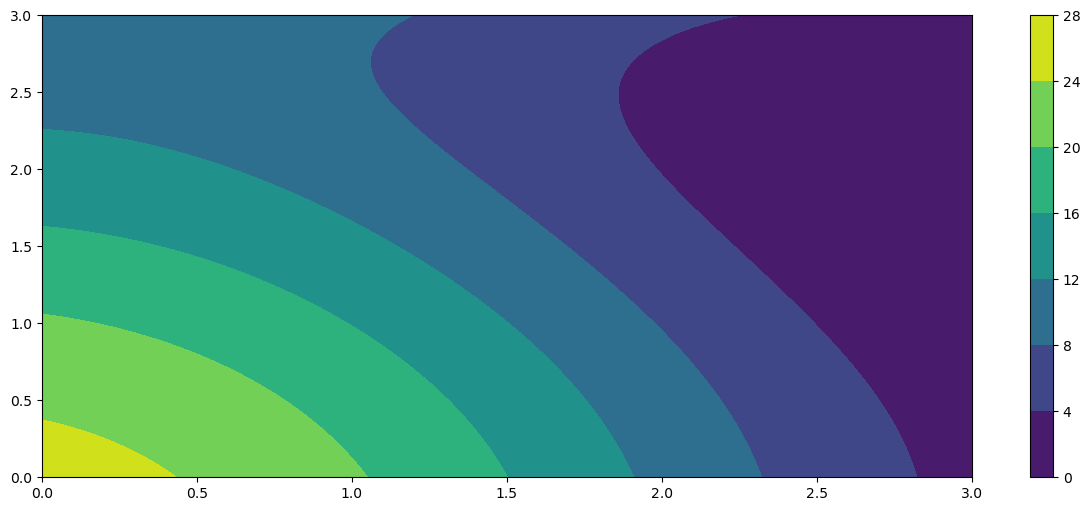

In [7]:
himmelblau = tfs.Himmelblau()
output = arraymesh_to_arrays(himmelblau.eval(xy), (n, n))

fig, ax = plt.subplots(1, 1)
im = ax.contourf(x_locations, y_locations, 0.15*output)
plt.colorbar(im)
plt.show()

# Simulator output (including Observations)

(40000, 6)


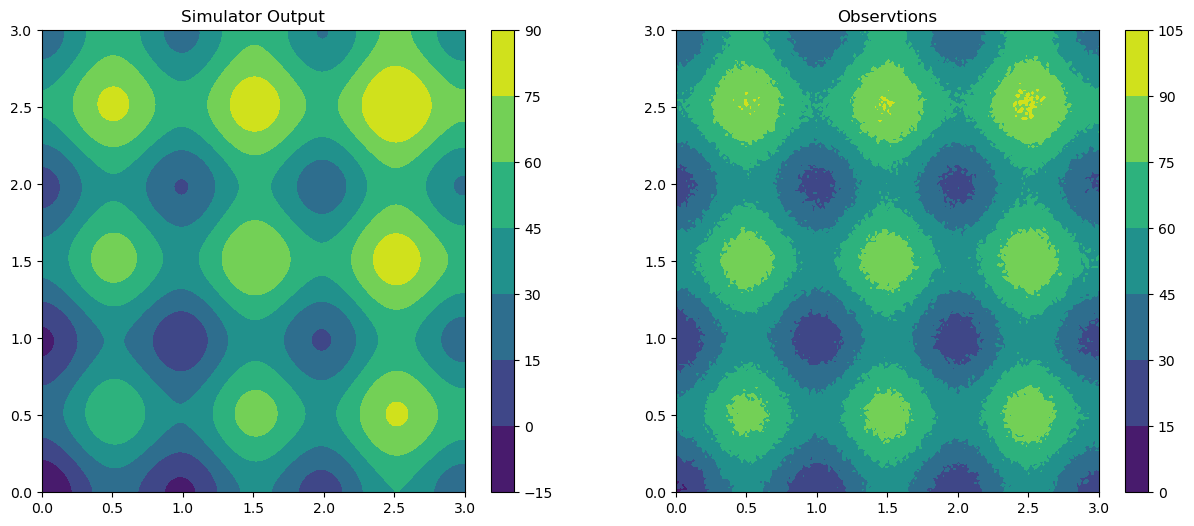

In [8]:
simulator = sim.Simulator(true_params, variable_params)

calibration_points = [1.5]
calibration_params = np.array(calibration_points).reshape(-1, 1)
experiment1 = simulator.run(calibration_params)
print(experiment1.shape)
simulation_output = experiment1[:, -1]
output = arraymesh_to_arrays(simulation_output, (n, n))
# regression_params = experiment1[:, [0,1]]

fig, ax = plt.subplots(1, 2)
CS0 = ax[0].contourf(x_locations, y_locations, output)
fig.colorbar(CS0, ax=ax[0])
ax[0].title.set_text('Simulator Output')


observations = simulator.get_observations(variable_params)[:, -1]
output = arraymesh_to_arrays(observations, (n, n))

CS1 = ax[1].contourf(x_locations, y_locations, output)
fig.colorbar(CS1, ax=ax[1])
ax[1].title.set_text('Observtions')